#**Human Cognitive Performance Project**
######In this project, I'm processing a dataset regarding cognitive performance based on lifestyle habits, and creating a Machine Learning model to predict the cognitive performance based on those parameters
###**Tools used in this project:**


* Google colab
* Python (with Pandas, Numpy, Matplotlib and Apache Spark)
* Kaggle dataset: https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis/code



###**The Project is divided into the following 3 Parts:**
####Part 1 - Loading and transforming the Dataset
####Part 2 - Creating visualizations to find relatioships between the parameters
####Part 3 - Creating and testing a Machine Learning Model for cognitive performance prediction

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.pipeline import PipelineModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler
import warnings
import sys
if not sys.warnoptions:
  warnings.simplefilter("ignore")


#**Part 1 - Loading and transforming the Dataset**

In [ ]:
#Loading the Dataset

df = pd.read_csv("/content/human_cognitive_performance.csv")
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [ ]:
#Information about the features
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
#Cheking for missing values
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Sleep_Duration,0
Stress_Level,0
Diet_Type,0
Daily_Screen_Time,0
Exercise_Frequency,0
Caffeine_Intake,0
Reaction_Time,0


In [ ]:
#Create a new column named "Cognittive_Class" to separate the results of the Cognitive Score into 4 Groups, for further analysis and Machine Learning
df["Cognitive_Class"] = pd.qcut(df["Cognitive_Score"], q=4, labels=["Low", "MediumLow", "MediumHigh", "High"])
df["Cognitive_Class"] = df["Cognitive_Class"].astype(str)

#Printing the amount of entries in each group
print("\nClass distribution:")
print(df['Cognitive_Class'].value_counts())


Class distribution:
Cognitive_Class
MediumHigh    20007
Low           20003
MediumLow     19999
High          19991
Name: count, dtype: int64


In [ ]:
#Renaming columns for better clarity and loading it into a new dataframe
df2 = df.rename(columns={"Caffeine_Intake": "Caffeine_Intake_mg", "Reaction_Time": "Reaction_Time_ms"})
df2

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake_mg,Reaction_Time_ms,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score,Cognitive_Class
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77,Low
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68,MediumLow
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54,Low
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59,MediumHigh
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.80,46.49,MediumLow
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,94.89,92.41,High
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,63.51,67.35,MediumHigh
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,81.43,77.95,High


In [ ]:
#Getting more information about our dataset, like mean and standard deviation
df2.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake_mg,Reaction_Time_ms,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


In [ ]:
#Preparing data for the prediction model by dropping unecessary columns

df2.drop(["User_ID", "AI_Predicted_Score"], axis=1, inplace=True)

#**Part 2 - Creating visualizations to find relatioships between the parameters**

<Figure size 1000x800 with 0 Axes>

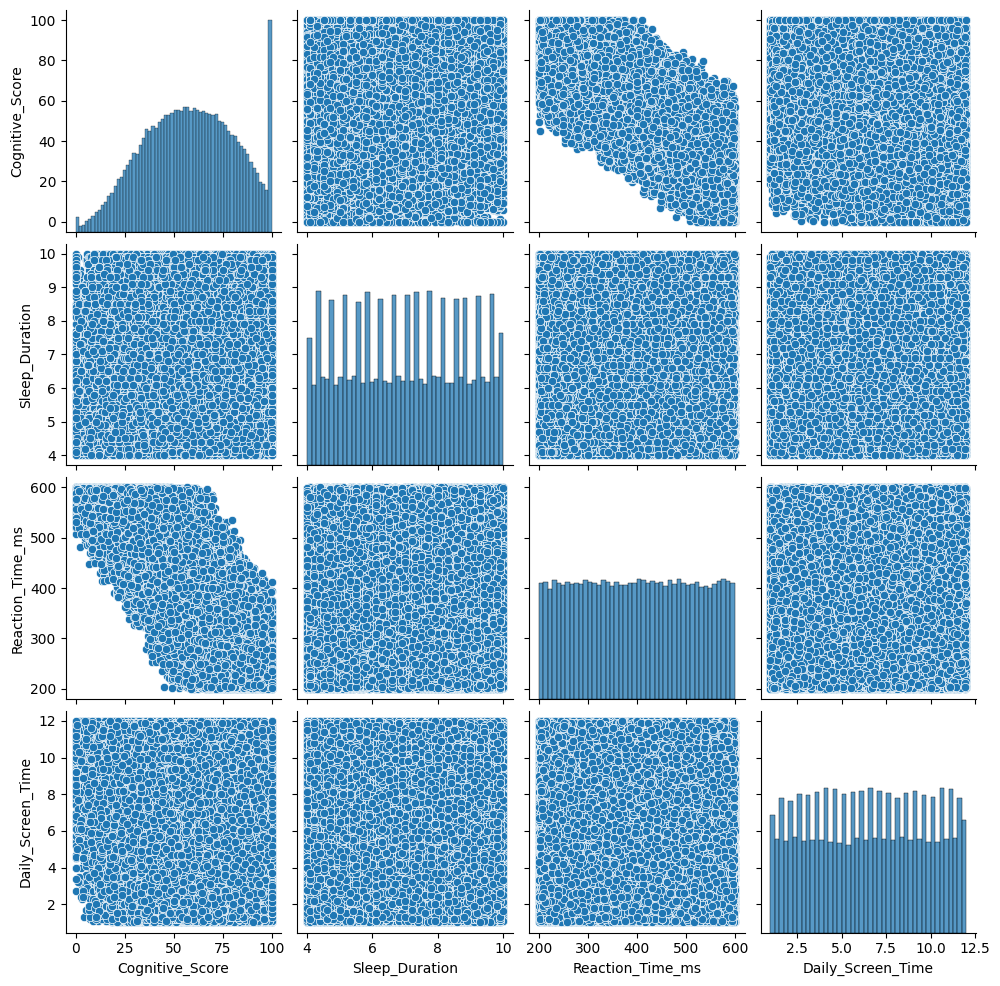

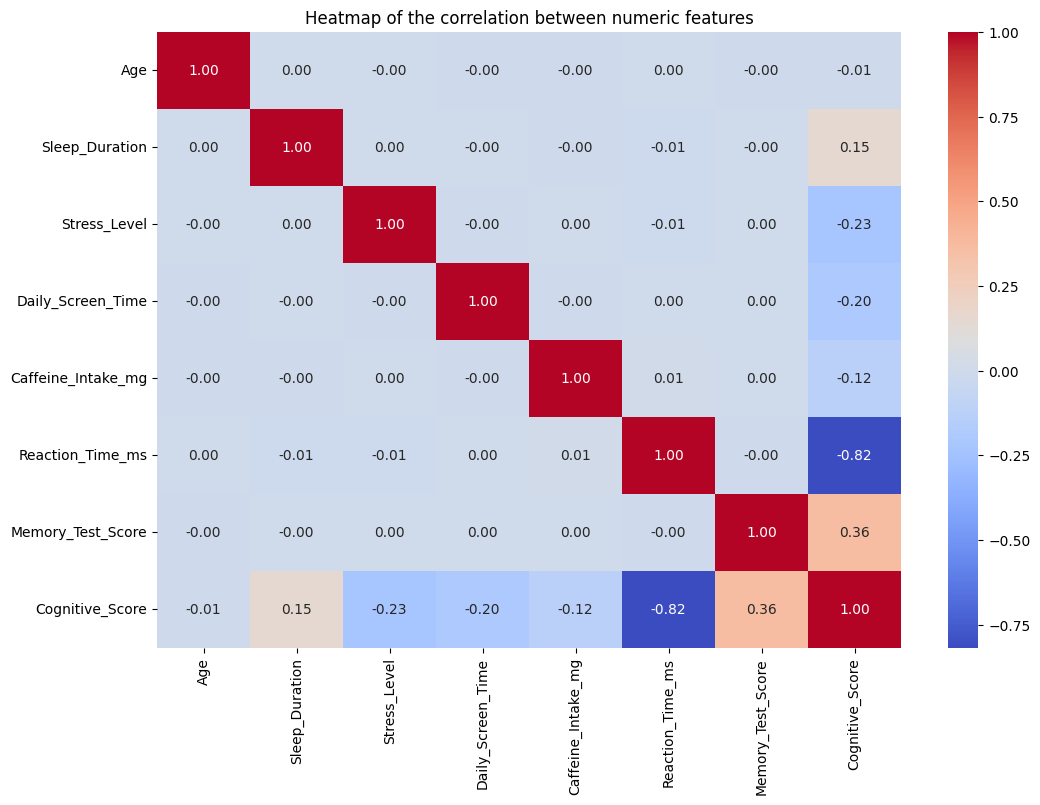

In [ ]:
#Visualizing the relationship between some columns
plt.figure(figsize=(10, 8))
sns.pairplot(df2, vars=["Cognitive_Score", "Sleep_Duration", "Reaction_Time_ms", "Daily_Screen_Time"])
plt.show()

#Selecting all numeric columns to compare in the heatmap and find the relationship between each other
numeric_df = df2.select_dtypes(include=[np.number])

# Correlation Heatmap between the parameters
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
    plt.title("Heatmap of the correlation between numeric features")
    plt.show()

In [ ]:
#Exporting the transformed dataset into a new csv File
df2.to_csv("Filtered_Performance.csv", index=False)

#**Part 3 - Creating and testing a Machine Learning Model for cognitive performance prediction**

In [ ]:
!pip install findspark

In [ ]:
#Creating the Spark Session

import findspark
findspark.init()

spark = SparkSession.builder.appName("Cognitive_Performance_Project").getOrCreate()

In [ ]:
#Loading the filtered csv to a Spark Dataframe
dfSpark = spark.read.csv("/content/Filtered_Performance.csv", header=True, inferSchema=True)

In [ ]:
#Creating a Machine learning pipeline

#String Indexer to map the categorical value into a numerical one
indexer = StringIndexer(inputCol="Diet_Type", outputCol="Diet_Type_Index")
indexer2 = StringIndexer(inputCol="Exercise_Frequency", outputCol="Exercise_Frequency_Index")

#Assembling the input columns into a single column "features"
assembler = VectorAssembler(inputCols=["Age", "Diet_Type_Index", "Exercise_Frequency_Index", "Sleep_Duration","Daily_Screen_Time","Reaction_Time_ms","Memory_Test_Score"], outputCol="features")

#Scaling the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

#Creating the Linear Regression
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="Cognitive_Score")

#Building the pipeline
pipeline = Pipeline(stages=[indexer, indexer2, assembler, scaler, lr])

In [ ]:
#Spliting the Data, 70% for training the model and 30 to test the model afterwards
(trainingData, testingData) = dfSpark.randomSplit([0.7, 0.3], seed=42)

In [ ]:
#Fitting the model
pipelineModel = pipeline.fit(trainingData)

In [ ]:
#Setting predictions on testing data
predictions = pipelineModel.transform(testingData)

In [ ]:
#Making a predictions and showing the top 10 rows
predictions.select("Cognitive_Score","prediction").show(15)

+---------------+------------------+
|Cognitive_Score|        prediction|
+---------------+------------------+
|          58.84|49.559079924558844|
|          49.98| 67.69146511501059|
|          77.74|  69.0948458416881|
|          33.22| 32.93739618747909|
|          36.58|37.772185824308885|
|           48.2| 54.44075454621336|
|           43.5| 41.69665317721322|
|          17.03|11.130489149527264|
|          71.46| 74.45910359799404|
|          67.77| 65.51717573306894|
|          34.14| 32.90653925786942|
|          51.47| 53.30867842433308|
|          60.04| 53.44327495357337|
|          72.84| 79.37017023540875|
|          91.61| 85.94825034401318|
+---------------+------------------+
only showing top 15 rows


In [ ]:
#Evaluating the model
#Calculating MSE(Mean Squared Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Cognitive_Score", metricName="mse")
mse = evaluator.evaluate(predictions)
print("MSE :",mse)

#Calculating MAE(Mean Absolute Error)
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Cognitive_Score", metricName="mae")
mae = evaluator.evaluate(predictions)
print('MAE :',mae)

#Calculating R-Squared(R2)
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Cognitive_Score", metricName="r2")
r2 = evaluator.evaluate(predictions)
print('R-Squared (R2) :',r2)

MSE : 73.43392206013587
MAE : 6.978585391612435
R-Squared (R2) : 0.8632548598764402


In [ ]:
#Persisting the model
pipelineModel.write().save("Cognitive_performance_project_ML_model")

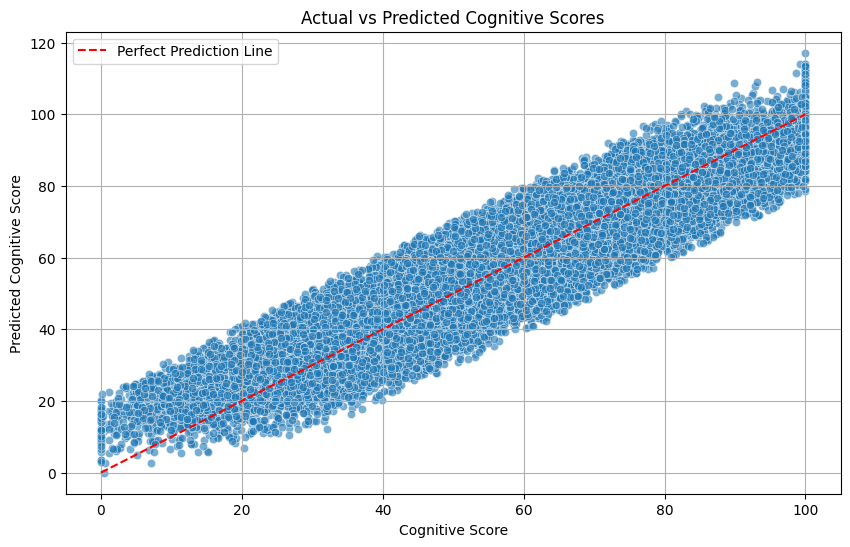

In [ ]:
#Plotting a visualization of the accuracy of the Prediction Model
predictions_pd = predictions.select("Cognitive_Score", "prediction").toPandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Cognitive_Score", y="prediction", data=predictions_pd, alpha=0.6)
plt.plot([predictions_pd["Cognitive_Score"].min(), predictions_pd["Cognitive_Score"].max()],
         [predictions_pd["Cognitive_Score"].min(), predictions_pd["Cognitive_Score"].max()],
         color="red", linestyle="--", label="Perfect Prediction Line")
plt.title("Actual vs Predicted Cognitive Scores")
plt.xlabel("Cognitive Score")
plt.ylabel("Predicted Cognitive Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7d93fb5f5d30>>